## 7. Performance of the Random Forest Regressor
This notebook is about the performance of our best model and its error analysis.

### Performance 

In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_theme()

Creating a dataframe of the predicted values

In [3]:
df_pred = pd.read_csv('../results/RandomForest_Predictions.csv')
df_pred['DAY']= pd.to_datetime(df_pred['TIMESTAMP']).dt.date

Creating a dataframe for the observed target values

In [4]:
df_target = pd.read_csv('../data/GEFCom2014Data/Wind/clean_data.csv', parse_dates=['TIMESTAMP'])
df_target = df_target[df_target['TIMESTAMP'] >= '2013-07-01 01:00:00']
df_target = df_target[['ZONEID', 'TARGETVAR', 'TIMESTAMP']]
df_target['DAY']= pd.to_datetime(df_target['TIMESTAMP']).dt.date

Performance of our model/windfarm

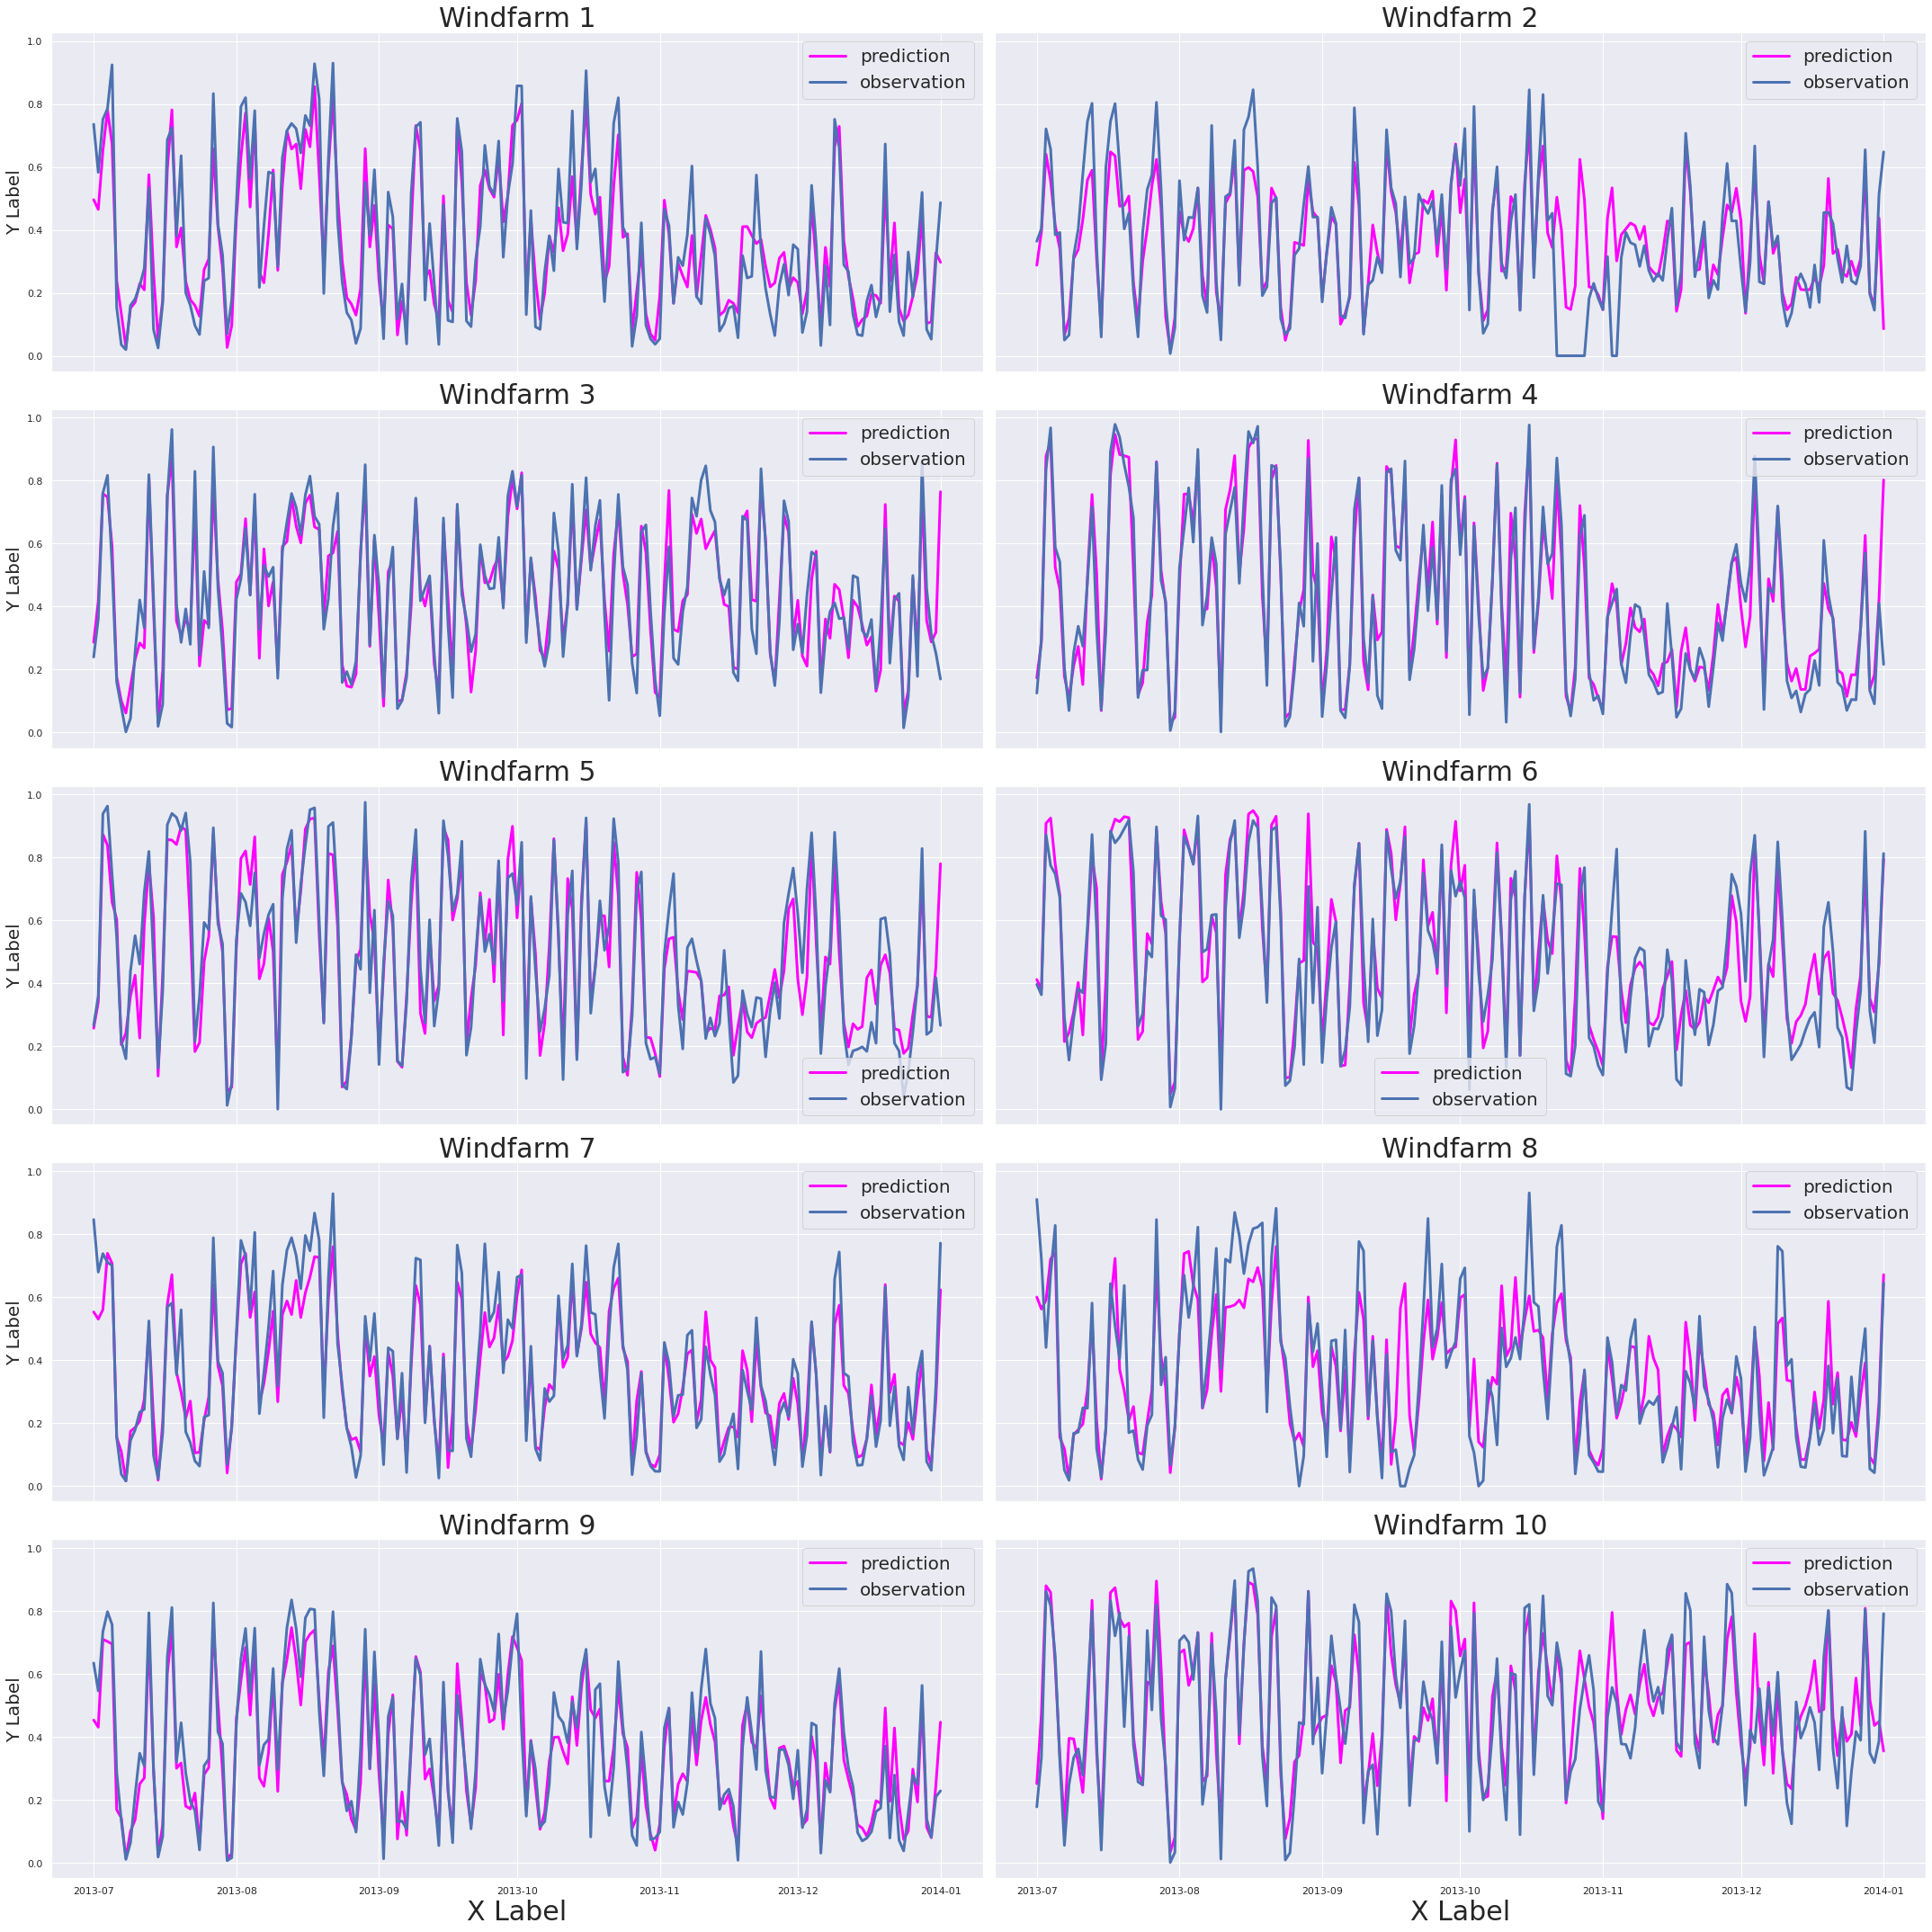

In [5]:
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(30,30), sharex=True, sharey=True)
axs = axs.ravel()

for zone in df_target.ZONEID.unique():
    tmp_target = df_target[df_target['ZONEID']==zone].groupby('DAY').mean()
    tmp_pred = df_pred.groupby('DAY').mean()['Zone {}'.format(str(zone))]    
    ax = axs[zone-1]
    ax.set_title('Windfarm {}'.format(zone), fontsize=30)
    lineplt = sns.lineplot(x = tmp_pred.index, y = tmp_pred.values, data = tmp_pred, color = 'magenta', ax=ax,
    linewidth = 3, label='prediction')
    sns.lineplot(x = tmp_target.index, y = tmp_target.TARGETVAR, data = tmp_target, ax=ax, 
    linewidth = 3,label='observation')
    lineplt.set_xlabel("Days between July 2013 and December 2013",fontsize=30)
    lineplt.set_ylabel("Target",fontsize=30)
    plt.legend(labels = ['prediction', 'observation'])
    lineplt.legend(fontsize=20)
fig.tight_layout();    


Average performance over all windfarms

In [6]:
all_target = df_target.groupby('DAY').mean()

df_tmp = df_pred.drop(['TIMESTAMP', 'DAY'], axis = 1)
df_pred['Total'] = df_tmp.mean(axis=1)
all_pred = df_pred.groupby('DAY').mean().Total
    

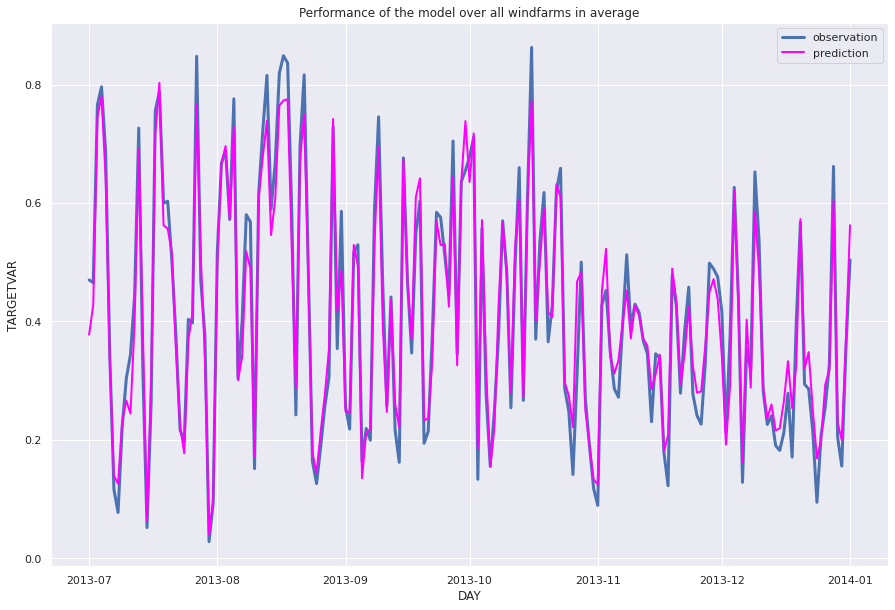

In [7]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.lineplot(x = all_target.index, y = all_target.TARGETVAR, data = all_target, linewidth = 3, label='observation')
sns.lineplot(x = all_pred.index, y = all_pred.values, data = all_pred, color = 'magenta', linewidth = 2,label='prediction')
plt.title('Performance of the model over all windfarms in average')
plt.legend(labels=['observation','prediction']);

The performance of the model is very good. But as epexted the prediction of the zero values of the target needs improvement.